Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
%pwd

'/home/gani/Desktop/UPGRAD/cnn_assignment'

In [5]:
# %cd /content/gdrive/My Drive/upgrad_cnn_assignment

In [3]:
%ls



 CNN_assignment.zip
 dataset/
 dataset-20231011T044849Z-001.zip
 dataset_old/
 dataset.zip
 README.md
'Starter_code_Assignment_CNN_Skin_Cancer (1).ipynb'
 Starter_code_Assignment_CNN_Skin_Cancer.ipynb


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("dataset/skin_cancer_images/Train")
data_dir_test = pathlib.Path('dataset/skin_cancer_images/Test')

image_count_train = 0

for dir in os.listdir(data_dir_train):
  sub_dir = os.path.join(data_dir_train, dir)
  if os.path.isdir(sub_dir):
    x = pathlib.Path(sub_dir)
    image_count_train += len(list(x.glob('*.jpg')))

print("Total Train images are : ", image_count_train)

image_count_test = 0
for dir in os.listdir(data_dir_test):
  sub_dir = os.path.join(data_dir_test, dir)
  if os.path.isdir(sub_dir):
    x = pathlib.Path(sub_dir)
    image_count_test += len(list(x.glob('*.jpg')))
print("Total Test images are : ", image_count_test)

Total Train images are :  2239
Total Test images are :  118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory('dataset/skin_cancer_images/Train',
                                        validation_split=0.2,
                                        subset="training",
                                        seed=123,
                                        image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory('dataset/skin_cancer_images/Train',
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

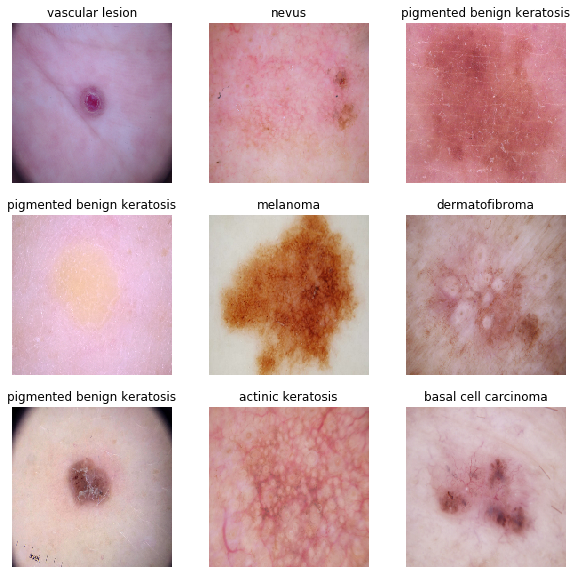

In [18]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [27]:
### Your code goes here
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [28]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [30]:
# View the summary of all layers
model.build(image_batch.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (32, 180, 180, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (32, 178, 178, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (32, 89, 89, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 87, 87, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 43, 43, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (32, 41, 41, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (32, 20, 20, 128)        

### Train the model

In [31]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 29s 525ms/step - loss: 2.0549 - accuracy: 0.1875 - val_loss: 2.0073 - val_accuracy: 0.2371
Epoch 2/30
56/56 [==============================] - 29s 523ms/step - loss: 1.9137 - accuracy: 0.2746 - val_loss: 1.7909 - val_accuracy: 0.3043
Epoch 3/30
56/56 [==============================] - 29s 520ms/step - loss: 1.7431 - accuracy: 0.3465 - val_loss: 1.8208 - val_accuracy: 0.3154
Epoch 4/30
56/56 [==============================] - 29s 523ms/step - loss: 1.6317 - accuracy: 0.4029 - val_loss: 1.6081 - val_accuracy: 0.3893
Epoch 5/30
56/56 [==============================] - 29s 521ms/step - loss: 1.6285 - accuracy: 0.4046 - val_loss: 1.5187 - val_accuracy: 0.4541
Epoch 6/30
56/56 [==============================] - 29s 522ms/step - loss: 1.5133 - accuracy: 0.4576 - val_loss: 1.4440 - val_accuracy: 0.4966
Epoch 7/30
56/56 [==============================] - 29s 522ms/step - loss: 1.4100 - accuracy: 0.5028 - val_loss: 1.3970 - val_accuracy: 0.5123

### Visualizing training results

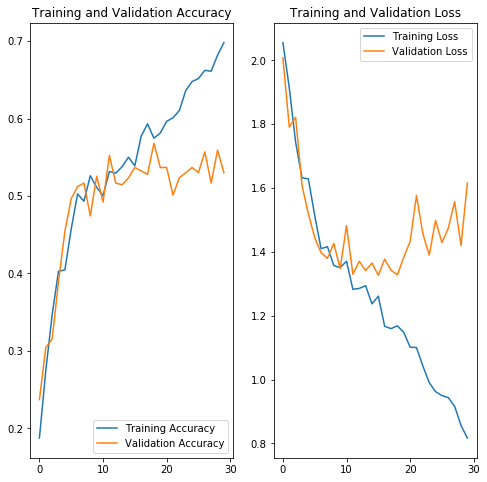

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model seems to be overfitting. As we can see the Validation Accuracy is plateaued, while Training Accuracy is still going up. Validation loss goes back up after 20 epochs suggesting overfitting

### Write your findings here

In [33]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# tf.image.fli_left_right, tf.image.adjust_brightness
# tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, tf.keras.layers.Rescaling, tf.keras.layers.Resizing

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

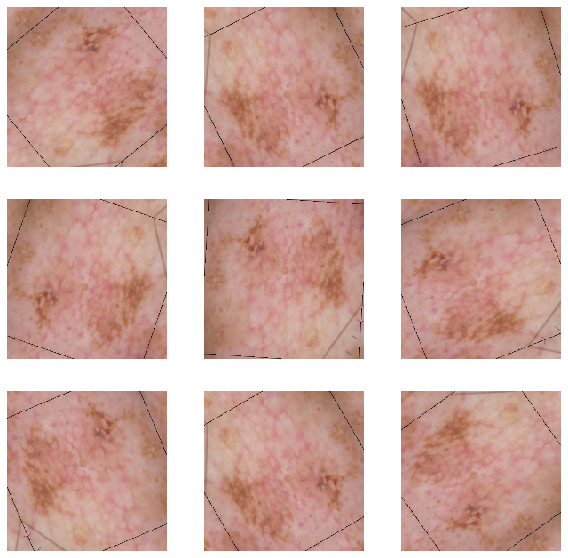

In [34]:
image, label = next(iter(train_ds))

# ### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  # print(augmented_image.shape)
  ax = plt.subplot(3, 3, i + 1)
  # print(type(augmented_image))
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

### Your code goes here
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [36]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [38]:
model.build(image_batch.shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (32, 180, 180, 3)         0         
_________________________________________________________________
sequential_2 (Sequential)    (32, 180, 180, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (32, 178, 178, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (32, 89, 89, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (32, 87, 87, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (32, 43, 43, 64)          0         
_________________________________________________________________
dropout (Dropout)            (32, 43, 43, 64)         

### Training the model

In [39]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 31s 551ms/step - loss: 2.0630 - accuracy: 0.2054 - val_loss: 2.0312 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 31s 548ms/step - loss: 1.9496 - accuracy: 0.2584 - val_loss: 1.8079 - val_accuracy: 0.3669
Epoch 3/30
56/56 [==============================] - 31s 546ms/step - loss: 1.8047 - accuracy: 0.3404 - val_loss: 1.7113 - val_accuracy: 0.3356
Epoch 4/30
56/56 [==============================] - 31s 547ms/step - loss: 1.7234 - accuracy: 0.3616 - val_loss: 1.6521 - val_accuracy: 0.3960
Epoch 5/30
56/56 [==============================] - 31s 548ms/step - loss: 1.6389 - accuracy: 0.4079 - val_loss: 1.6239 - val_accuracy: 0.4497
Epoch 6/30
56/56 [==============================] - 31s 548ms/step - loss: 1.6252 - accuracy: 0.4219 - val_loss: 1.5690 - val_accuracy: 0.4541
Epoch 7/30
56/56 [==============================] - 31s 550ms/step - loss: 1.5815 - accuracy: 0.4381 - val_loss: 1.5536 - val_accuracy: 0.4541

### Visualizing the results

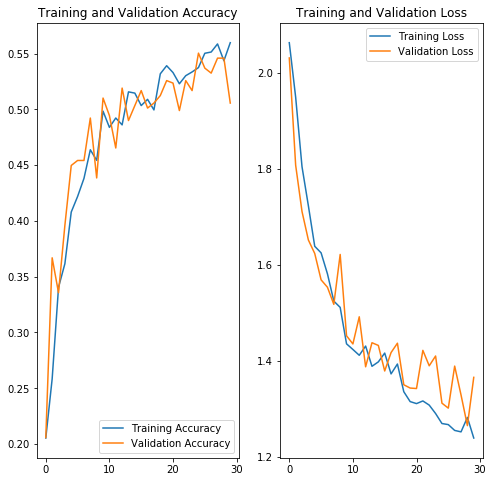

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After adding dropout to the model and data augmentation, overfitting has stopped.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [41]:

train_ds = image_dataset_from_directory('dataset/skin_cancer_images/Train',
                                        validation_split=0.2,
                                        subset="training",
                                        seed=123,
                                        image_size=(img_height, img_width),
                                        batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [42]:
# for i, class_name in enumerate(class_names):
#     num_samples = tf.data.experimental.cardinality(train_ds.filter(lambda x, l: tf.math.equal(l[0], i))).numpy()
#     print(f"{class_name}: {num_samples}")

# print(train_ds.filter(lambda x, l: tf.math.equal(l[0], 0)))

count = np.zeros(num_classes, dtype=np.int32)
for _, labels in train_ds:
  y, _, c = tf.unique_with_counts(labels)
  count[y.numpy()] += c.numpy()

print(count)




[ 92 309  77 352 277 370  58 142 115]


In [43]:
sample_dict = {}
for i, j in enumerate(class_names):
  sample_dict[j] = count[i]

print(sample_dict)

{'actinic keratosis': 92, 'basal cell carcinoma': 309, 'dermatofibroma': 77, 'melanoma': 352, 'nevus': 277, 'pigmented benign keratosis': 370, 'seborrheic keratosis': 58, 'squamous cell carcinoma': 142, 'vascular lesion': 115}


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#####  Seborrheic Kratosis has the least number of samples with 58.
#### - Which classes dominate the data in terms proportionate number of samples?
#####  Melanoma, pigmented benign keratosis and basal cell carcinoma have over soo samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [44]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
path_to_training_dataset="dataset/skin_cancer_images/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B181B2490>:   1%|▏         | 7/500 [00:00<00:19, 25.40 Samples/s]                  

Initialised with 114 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B181A8580>: 100%|██████████| 500/500 [00:02<00:00, 207.84 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B1822FBB0>:   2%|▏         | 9/500 [00:00<00:50,  9.78 Samples/s]                  

Initialised with 376 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B182362B0>: 100%|██████████| 500/500 [00:02<00:00, 222.58 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6B181C6730>:   2%|▏         | 9/500 [00:00<00:53,  9.17 Samples/s]

Initialised with 95 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B180D71F0>: 100%|██████████| 500/500 [00:02<00:00, 213.31 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6B1816E190>:   0%|          | 2/500 [00:00<01:20,  6.20 Samples/s]

Initialised with 438 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6B180C89A0>: 100%|██████████| 500/500 [00:08<00:00, 61.39 Samples/s]                   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F6B181BF220>: 100%|██████████| 500/500 [00:09<00:00, 52.88 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B18181A60>:   3%|▎         | 13/500 [00:00<00:10, 47.60 Samples/s]                  

Initialised with 462 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6B1815F670>: 100%|██████████| 500/500 [00:02<00:00, 218.04 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6B7974AA60>: 100%|██████████| 500/500 [00:04<00:00, 112.59 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B18176880>:   3%|▎         | 13/500 [00:00<00:12, 38.54 Samples/s]                  

Initialised with 181 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B183EB1C0>: 100%|██████████| 500/500 [00:02<00:00, 216.37 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6B183C21C0>:   2%|▏         | 10/500 [00:00<00:13, 36.31 Samples/s]

Initialised with 139 image(s) found.
Output directory set to dataset/skin_cancer_images/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6B1821FE20>: 100%|██████████| 500/500 [00:02<00:00, 227.22 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [46]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [47]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0033295.jpg_59e7379b-e496-4ad3-8792-2aa495fda910.jpg',
 'dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025350.jpg_6d21293d-5aa0-4f12-a7f8-ce66ecb6a77e.jpg',
 'dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030844.jpg_78540df6-30bd-4d9c-aa6e-73861c42a64b.jpg',
 'dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031570.jpg_c1ba06e9-c802-49be-9544-6581d13391cb.jpg',
 'dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026203.jpg_acc15537-4a55-48b2-ab47-4e514f6decc6.jpg',
 'dataset/skin_cancer_images/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030794.jpg_29b97675-29ae-4f25-92e0-ad6a3c3f8b92.jpg',
 'dataset/skin_cancer_images/Train/squamous ce

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [67]:

train_aug_dir = 'dataset/skin_cancer_images/Train_Aug'
train_dir = 'dataset/skin_cancer_images/Train'
aug_dir = 'output'

aug_train_img_list = glob(os.path.join(train_dir, '*', aug_dir, '*.jpg'))
train_img_list = glob(os.path.join(train_dir, '*', '*.jpg'))


print(len(aug_train_img_list))
print(len(train_img_list))


4500
2239
4500
2239


In [66]:
# create new dir for Augmented training images
if not os.path.exists(train_aug_dir):
  os.mkdir(train_aug_dir)

for label in class_names:
  print(label)
  if not os.path.exists(os.path.join(train_aug_dir, label)):
    os.mkdir(os.path.join(train_aug_dir, label))

  for each_file in train_img_list:
    if each_file.split("/")[3] == label:
      shutil.copy(each_file, os.path.join(train_aug_dir, label))

  for each_file in aug_train_img_list:
    if each_file.split("/")[3] == label:
      shutil.copy(each_file, os.path.join(train_aug_dir, label))




actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


In [54]:
# dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [68]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [71]:
data_dir_train="dataset/skin_cancer_images/Train_Aug"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [72]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [76]:
## your code goes here
### Your code goes here
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    # data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes)
])

## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

model.build(image_batch.shape)
model.summary()

(32, 180, 180, 3)
(32,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (32, 180, 180, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (32, 178, 178, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (32, 89, 89, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (32, 87, 87, 64)          18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (32, 43, 43, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (32, 43, 43, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (

#### **Todo:**  Train your model

In [77]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 121s 713ms/step - loss: 2.0085 - accuracy: 0.2114 - val_loss: 1.8503 - val_accuracy: 0.3133
Epoch 2/30
169/169 [==============================] - 121s 718ms/step - loss: 1.7007 - accuracy: 0.3331 - val_loss: 1.5310 - val_accuracy: 0.4143
Epoch 3/30
169/169 [==============================] - 122s 721ms/step - loss: 1.5362 - accuracy: 0.4045 - val_loss: 1.5253 - val_accuracy: 0.4024
Epoch 4/30
169/169 [==============================] - 122s 720ms/step - loss: 1.4521 - accuracy: 0.4284 - val_loss: 1.4230 - val_accuracy: 0.4284
Epoch 5/30
169/169 [==============================] - 122s 721ms/step - loss: 1.3987 - accuracy: 0.4501 - val_loss: 1.4988 - val_accuracy: 0.4336
Epoch 6/30
169/169 [==============================] - 122s 720ms/step - loss: 1.3629 - accuracy: 0.4664 - val_loss: 1.3379 - val_accuracy: 0.4915
Epoch 7/30
169/169 [==============================] - 122s 721ms/step - loss: 1.2926 - accuracy: 0.4961 - val_loss: 1.2206 -

#### **Todo:**  Visualize the model results

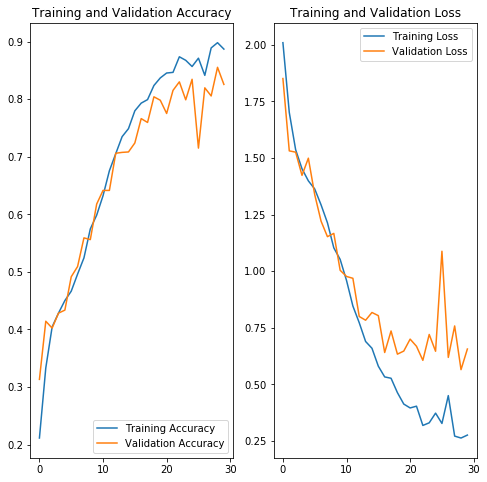

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Class rebalance helped in overfitting. Now we can see that the model accuracy has improved drastically compared to previous experiment

#### Inference on Test Data

In [9]:
test_ds = image_dataset_from_directory('dataset/skin_cancer_images/Test',
                                        validation_split=0.9,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [14]:
# y_pred_probabilities = model.predict(test_ds)
y_pred_probabilities = [4, 0, 7, 7, 4, 5, 2, 4, 1, 5, 3, 4, 4, 2, 4, 5, 4, 3, 1, 4, 1, 1,
       8, 4, 4, 5, 0, 4, 4, 5, 5, 7, 5, 4, 7, 4, 5, 5, 3, 5, 5, 8, 4, 4,
       4, 5, 5, 7, 2, 4, 1, 4, 1, 1, 4, 7, 4, 7, 5, 4, 4, 4, 4, 5, 5, 4,
       4, 2, 2, 0, 2, 4, 0, 7, 4, 3, 1, 0, 5, 4, 0, 4, 3, 4, 4, 5, 3, 3,
       0, 0, 3, 5, 4, 4, 4, 2, 2, 4, 4, 3, 5, 4, 5, 5, 3, 5]

y_pred_probabilities = np.array(y_pred_probabilities)
y_pred = np.argmax(y_pred_probabilities, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
y_pred = [4, 0, 7, 7, 4, 5, 2, 4, 1, 5, 3, 4, 4, 2, 4, 5, 4, 3, 1, 4, 1, 1,
       8, 4, 4, 5, 0, 4, 4, 5, 5, 7, 5, 4, 7, 4, 5, 5, 3, 5, 5, 8, 4, 4,
       4, 5, 5, 7, 2, 4, 1, 4, 1, 1, 4, 7, 4, 7, 5, 4, 4, 4, 4, 5, 5, 4,
       4, 2, 2, 0, 2, 4, 0, 7, 4, 3, 1, 0, 5, 4, 0, 4, 3, 4, 4, 5, 3, 3,
       0, 0, 3, 5, 4, 4, 4, 2, 2, 4, 4, 3, 5, 4, 5, 5, 3, 5]

y_pred = np.array(y_pred)

In [15]:
import numpy as np
y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_true

array([0, 2, 4, 2, 4, 4, 2, 2, 1, 4, 7, 1, 0, 7, 2, 4, 0, 2, 4, 1, 7, 7,
       1, 1, 5, 2, 0, 7, 2, 0, 2, 1, 5, 7, 2, 3, 7, 0, 3, 7, 7, 3, 4, 0,
       4, 3, 3, 3, 1, 4, 1, 6, 6, 2, 7, 2, 8, 5, 3, 7, 4, 4, 8, 7, 0, 3,
       4, 1, 6, 2, 0, 5, 7, 1, 1, 3, 0, 5, 1, 1, 7, 2, 5, 0, 0, 2, 4, 0,
       3, 4, 4, 5, 4, 5, 7, 3, 3, 1, 5, 5, 1, 7, 5, 3, 0, 5], dtype=int32)

#### Lets create a confusion matrix
It will help us in deriving different metrics such as accuracy, recall, f1 score


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [18]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)

for class_idx, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Precision: {precision_per_class[class_idx]}")
    print(f"Recall: {recall_per_class[class_idx]}")
    print("-------------------")

Accuracy: 0.16981132075471697
Confusion Matrix:
[[1 1 1 2 6 3 0 0 0]
 [0 2 2 0 6 2 0 2 1]
 [2 1 1 1 4 3 0 3 0]
 [1 0 2 2 2 4 0 1 1]
 [1 1 0 2 8 3 0 1 0]
 [1 0 0 2 4 4 0 1 0]
 [0 1 1 0 1 0 0 0 0]
 [2 2 1 1 6 4 0 0 0]
 [0 0 0 0 2 0 0 0 0]]
Class: actinic keratosis
Precision: 0.125
Recall: 0.07142857142857142
-------------------
Class: basal cell carcinoma
Precision: 0.25
Recall: 0.13333333333333333
-------------------
Class: dermatofibroma
Precision: 0.125
Recall: 0.06666666666666667
-------------------
Class: melanoma
Precision: 0.2
Recall: 0.15384615384615385
-------------------
Class: nevus
Precision: 0.20512820512820512
Recall: 0.5
-------------------
Class: pigmented benign keratosis
Precision: 0.17391304347826086
Recall: 0.3333333333333333
-------------------
Class: seborrheic keratosis
Precision: 0.0
Recall: 0.0
-------------------
Class: squamous cell carcinoma
Precision: 0.0
Recall: 0.0
-------------------
Class: vascular lesion
Precision: 0.0
Recall: 0.0
-------------------


/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
